In [16]:
from keras.models import load_model
from keras.datasets import cifar10
from keras.utils import to_categorical
(trainX,trainY),(testX,testY) = cifar10.load_data()
trainY3 = ((trainY == 0)+(trainY ==1) +(trainY==2))
trainY3_class = trainY[trainY3]
trainX_class = trainX[trainY3[:,0],:,:,:]
testY3 = ((testY == 0)+(testY ==1) +(testY==2))
testY3_class = testY[testY3]
testX_class = testX[testY3[:,0],:,:,:]

In [17]:
print(len(trainY3_class))

15000


In [18]:
trainX = trainX_class.reshape(15000,32*3*32)
testX = testX_class.reshape(3000,32*3*32)

trainY = to_categorical(trainY3_class)
testY = to_categorical(testY3_class)

In [19]:
print(trainY)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [20]:
x_train = trainX/255
X_test = testX/255

In [21]:
x_val = x_train[:2500]
partial_x_train = x_train[2500:]
y_val = trainY[:2500]
partial_y_train = trainY[2500:]

In [22]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(128,activation = 'relu',input_shape = (3072,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [23]:
import keras
keras.optimizers.SGD(learning_rate=0.03, momentum=0.0, nesterov=False)
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(partial_x_train,partial_y_train,epochs = 50,batch_size  =150,validation_data = (x_val,y_val))
model.save("file.h5")

Train on 12500 samples, validate on 2500 samples
Epoch 1/50
12500/12500 [==============================] - 2s 157us/step - loss: 1.0252 - accuracy: 0.5194 - val_loss: 0.9603 - val_accuracy: 0.5160
Epoch 2/50
12500/12500 [==============================] - 2s 122us/step - loss: 0.8916 - accuracy: 0.6237 - val_loss: 0.9412 - val_accuracy: 0.5520
Epoch 3/50
12500/12500 [==============================] - 1s 115us/step - loss: 0.8322 - accuracy: 0.6427 - val_loss: 0.7700 - val_accuracy: 0.6892
Epoch 4/50
12500/12500 [==============================] - 1s 116us/step - loss: 0.7809 - accuracy: 0.6754 - val_loss: 0.7669 - val_accuracy: 0.6752
Epoch 5/50
12500/12500 [==============================] - 1s 115us/step - loss: 0.7568 - accuracy: 0.6862 - val_loss: 0.7180 - val_accuracy: 0.7044
Epoch 6/50
12500/12500 [==============================] - 1s 117us/step - loss: 0.7426 - accuracy: 0.6926 - val_loss: 0.7412 - val_accuracy: 0.6912
Epoch 7/50
12500/12500 [==============================] - 1s 11

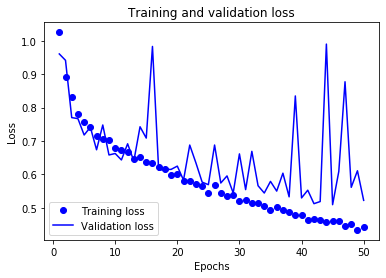

In [25]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
var = load_model("file.h5")
result =var.evaluate(X_test,testY)
result =model.evaluate(X_test,testY)
print(result)

3000/3000 [==============================] - 0s 92us/step
[0.5147012565930684, 0.7950000166893005]
